## MAIN TASK
## 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
## 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('vgames2.csv', encoding='utf-8')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
def f(x): 
  if 'M' in x :
     return (float(x.replace('M','')))

  elif 'K' in x :
     return (float(x.replace('K',''))) * 0.001

  else:
     return float(x)

In [ ]:
df1 = df['NA_Sales'].apply(lambda x : f(x))
df2 = df['EU_Sales'].apply(lambda x : f(x))
df3 = df['JP_Sales'].apply(lambda x : f(x))
df4 = df['Other_Sales'].apply(lambda x : f(x))

In [ ]:
df5 = pd.concat([df1, df2, df3, df4], axis=1)
df5

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16593,0.15,0.04,0.00,0.01
16594,0.01,0.00,0.00,0.00
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [ ]:
df5[['JP_Sales','Other_Sales']].sum()

JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [ ]:
jp = df5['JP_Sales']
ot = df5['Other_Sales']
df5['Asia_Sales'] = list(jp + ot)

In [ ]:
df5['Asia_Sales'].sum()

2088.77

In [ ]:
df5 = df5.drop(['JP_Sales', 'Other_Sales'], axis=1)
df5

,NA_Sales,EU_Sales,Asia_Sales
0,0.04,0.00,0.00
1,0.17,0.00,0.01
2,0.00,0.00,0.02
3,0.04,0.00,0.00
4,0.12,0.09,0.04
...,...,...,...
16593,0.15,0.04,0.01
16594,0.01,0.00,0.00
16595,0.44,0.19,0.16
16596,0.05,0.05,0.28


In [ ]:
df5.isnull().sum()

NA_Sales      0
EU_Sales      0
Asia_Sales    0
dtype: int64

In [ ]:
df5.describe()

,NA_Sales,EU_Sales,Asia_Sales
count,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.125845
std,0.816683,0.505351,0.406299
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.010000
50%,0.080000,0.020000,0.030000
75%,0.240000,0.110000,0.100000
max,41.490000,29.020000,12.230000


In [ ]:
df6 = df.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [ ]:
df7 = pd.concat([df6, df5], axis = 1)
df7 = df7.drop(['Unnamed: 0'], axis=1)
df7

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Asia_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.04
...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.16
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.28


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

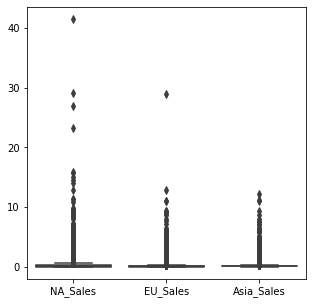

In [ ]:
fig = plt.figure(figsize=(5,5))
ax=fig.gca()
sns.boxplot(data=df7[['NA_Sales','EU_Sales','Asia_Sales']], ax=ax)
plt.show()

In [ ]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3 -q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data < lower_bound))

In [ ]:
NA_lead_outlier_index = outliers_iqr(df7['NA_Sales'])[0]
EU_lead_outlier_index = outliers_iqr(df7['EU_Sales'])[0]
Asia_lead_outlier_index = outliers_iqr(df7['Asia_Sales'])[0]

In [ ]:
df7.loc[NA_lead_outlier_index, 'NA_Sales']

31       1.93
92       0.67
107      1.19
122      5.91
126      1.98
         ... 
16552    2.66
16573    1.26
16583    0.91
16587    1.38
16591    4.18
Name: NA_Sales, Length: 1681, dtype: float64

In [ ]:
df7.loc[EU_lead_outlier_index, 'EU_Sales']

10       0.33
20       0.45
24       0.53
31       0.34
44       0.33
         ... 
16563    0.40
16573    0.60
16575    0.64
16583    0.39
16587    0.80
Name: EU_Sales, Length: 2081, dtype: float64

In [ ]:
df7.loc[Asia_lead_outlier_index, 'Asia_Sales']

24       0.24
40       0.36
42       0.29
59       0.85
65       0.37
         ... 
16552    0.35
16564    0.26
16565    0.62
16566    0.45
16596    0.28
Name: Asia_Sales, Length: 1965, dtype: float64

In [ ]:
lead_outlier_index = np.concatenate((NA_lead_outlier_index,
                                     EU_lead_outlier_index,
                                     Asia_lead_outlier_index,
                                     ), axis=None)
print(len(lead_outlier_index))
lead_outlier_index

5727


array([   31,    92,   107, ..., 16565, 16566, 16596])

In [ ]:
lead_not_outlier_index = []

for i in df7.index:

  if i not in lead_outlier_index : 
      lead_not_outlier_index.append(i)

In [ ]:
df7_clean = df7.loc[lead_not_outlier_index]
df7_clean = df7_clean.reset_index(drop=True)
df7_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Asia_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.04
...,...,...,...,...,...,...,...,...
12991,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.00,0.00,0.02
12992,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.01
12993,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00
12994,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.16


In [ ]:
df7_clean.isna().sum()

Name            0
Platform        0
Year          226
Genre          36
Publisher      52
NA_Sales        0
EU_Sales        0
Asia_Sales      0
dtype: int64

In [ ]:
df7_clean = df7_clean.dropna(axis=0)
df7_clean.isna().sum()

Name          0
Platform      0
Year          0
Genre         0
Publisher     0
NA_Sales      0
EU_Sales      0
Asia_Sales    0
dtype: int64

In [ ]:
s1 = df7_clean['Year'].to_numpy()
s1

array([2008., 2009., 2010., ..., 2005., 2015., 1996.])

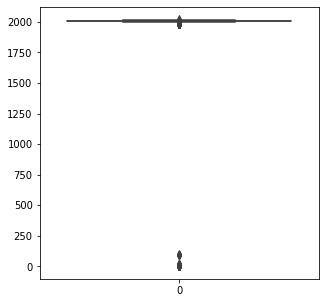

In [ ]:
fig = plt.figure(figsize=(5,5))
ax=fig.gca()
sns.boxplot(data=df7_clean['Year'], ax=ax)
plt.show()

In [ ]:
df7_clean[df7_clean['Year']<1900.0]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Asia_Sales
64,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.03
70,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.01
180,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.01
257,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00
807,Wolfenstein,PC,9.0,Shooter,Activision,0.01,0.03,0.01
...,...,...,...,...,...,...,...,...
12413,Theatrhythm Dragon Quest,3DS,15.0,Misc,Square Enix,0.00,0.00,0.15
12528,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.00,0.00,0.02
12633,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0.00,0.00
12665,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.08


In [ ]:
def set_year(x):
  if x <= 21.0:
    return x + 2000.0
  elif 21.0 < x <= 99.0:
    return x + 1900.0
  else:
    return x


In [ ]:
df_year = df7_clean['Year'].apply(lambda x : set_year(x))
df_year.describe()

count    12700.000000
mean      2006.867480
std          5.333983
min       1980.000000
25%       2004.000000
50%       2008.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [ ]:
df8 = df7_clean.drop(['Year'], axis=1)
df8 = pd.concat([df8, df_year], axis=1)
df8

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,Asia_Sales,Year
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0.00,0.00,2008.0
1,The Munchables,Wii,Action,Namco Bandai Games,0.17,0.00,0.01,2009.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.00,0.00,0.02,2010.0
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0.00,0.00,2010.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.12,0.09,0.04,2010.0
...,...,...,...,...,...,...,...,...
12991,Minna no Chizu 2,PSP,Misc,Zenrin,0.00,0.00,0.02,2007.0
12992,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,0.15,0.04,0.01,2006.0
12993,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,0.01,0.00,0.00,2005.0
12994,NBA 2K16,PS3,Sports,Take-Two Interactive,0.44,0.19,0.16,2015.0


In [ ]:
df8['Genre'].value_counts()

Action          2574
Sports          1728
Misc            1375
Adventure       1175
Role-Playing    1048
Racing           940
Shooter          934
Simulation       670
Fighting         622
Platform         609
Strategy         560
Puzzle           465
Name: Genre, dtype: int64

In [ ]:
df9 = df8.drop(['Name',	'Platform',	'Publisher','Year'], axis=1)
df9

,Genre,NA_Sales,EU_Sales,Asia_Sales
0,Action,0.04,0.00,0.00
1,Action,0.17,0.00,0.01
2,Adventure,0.00,0.00,0.02
3,Misc,0.04,0.00,0.00
4,Platform,0.12,0.09,0.04
...,...,...,...,...
12991,Misc,0.00,0.00,0.02
12992,Platform,0.15,0.04,0.01
12993,Action,0.01,0.00,0.00
12994,Sports,0.44,0.19,0.16


In [ ]:
group = df9.groupby('Genre')
group.size()

Genre
Action          2574
Adventure       1175
Fighting         622
Misc            1375
Platform         609
Puzzle           465
Racing           940
Role-Playing    1048
Shooter          934
Simulation       670
Sports          1728
Strategy         560
dtype: int64

In [ ]:
df10 = group.sum()
df10

,NA_Sales,EU_Sales,Asia_Sales
Genre,,,
Action,278.29,124.91,88.53
Adventure,52.34,24.98,37.18
Fighting,62.35,26.29,32.70
Misc,141.01,48.93,43.82
Platform,77.87,32.29,15.45
Puzzle,34.68,11.84,9.80
Racing,100.50,49.12,19.40
Role-Playing,68.35,30.18,63.45
Shooter,109.11,54.98,25.90


In [ ]:
group.mean()

,NA_Sales,EU_Sales,Asia_Sales
Genre,,,
Action,0.108116,0.048528,0.034394
Adventure,0.044545,0.021260,0.031643
Fighting,0.100241,0.042267,0.052572
Misc,0.102553,0.035585,0.031869
Platform,0.127865,0.053021,0.025369
Puzzle,0.074581,0.025462,0.021075
Racing,0.106915,0.052255,0.020638
Role-Playing,0.065219,0.028798,0.060544
Shooter,0.116820,0.058865,0.027730


In [ ]:
df10['Genre_total'] = df10['NA_Sales'] + df10['NA_Sales'] + df10['Asia_Sales']
df10

,NA_Sales,EU_Sales,Asia_Sales,Genre_total
Genre,,,,
Action,278.29,124.91,88.53,645.11
Adventure,52.34,24.98,37.18,141.86
Fighting,62.35,26.29,32.70,157.40
Misc,141.01,48.93,43.82,325.84
Platform,77.87,32.29,15.45,171.19
Puzzle,34.68,11.84,9.80,79.16
Racing,100.50,49.12,19.40,220.40
Role-Playing,68.35,30.18,63.45,200.15
Shooter,109.11,54.98,25.90,244.12


In [ ]:

df10 = df10.T

In [ ]:
df10.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [ ]:
df10['Regions_total'] = df10['Action'] + df10['Adventure'] + df10['Fighting'] + df10['Misc'] + df10['Platform'] + df10['Puzzle'] + df10['Racing'] + df10['Role-Playing']+ df10['Shooter'] + df10['Simulation']+ df10['Sports']+ df10['Strategy']

In [ ]:
df10

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Regions_total
NA_Sales,278.29,52.34,62.35,141.01,77.87,34.68,100.50,68.35,109.11,71.24,218.81,29.21,1243.76
EU_Sales,124.91,24.98,26.29,48.93,32.29,11.84,49.12,30.18,54.98,21.38,76.05,18.71,519.66
Asia_Sales,88.53,37.18,32.70,43.82,15.45,9.80,19.40,63.45,25.90,19.57,56.33,20.59,432.72
Genre_total,645.11,141.86,157.40,325.84,171.19,79.16,220.40,200.15,244.12,162.05,493.95,79.01,2920.24


In [ ]:
def to_proportion(x):
  return x / df10['Regions_total']

In [ ]:
df10 = df10.apply(lambda x : to_proportion(x))
df10

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Regions_total
NA_Sales,0.223749,0.042082,0.050130,0.113374,0.062609,0.027883,0.080803,0.054954,0.087726,0.057278,0.175926,0.023485,1.0
EU_Sales,0.240369,0.048070,0.050591,0.094158,0.062137,0.022784,0.094523,0.058076,0.105800,0.041142,0.146346,0.036004,1.0
Asia_Sales,0.204590,0.085922,0.075568,0.101266,0.035704,0.022647,0.044833,0.146631,0.059854,0.045226,0.130177,0.047583,1.0
Genre_total,0.220910,0.048578,0.053900,0.111580,0.058622,0.027107,0.075473,0.068539,0.083596,0.055492,0.169147,0.027056,1.0


In [ ]:
df10 = df10.drop(['Regions_total'], axis=1)
df10

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.223749,0.042082,0.050130,0.113374,0.062609,0.027883,0.080803,0.054954,0.087726,0.057278,0.175926,0.023485
EU_Sales,0.240369,0.048070,0.050591,0.094158,0.062137,0.022784,0.094523,0.058076,0.105800,0.041142,0.146346,0.036004
Asia_Sales,0.204590,0.085922,0.075568,0.101266,0.035704,0.022647,0.044833,0.146631,0.059854,0.045226,0.130177,0.047583
Genre_total,0.220910,0.048578,0.053900,0.111580,0.058622,0.027107,0.075473,0.068539,0.083596,0.055492,0.169147,0.027056


## 지역별 게임장르 선호도

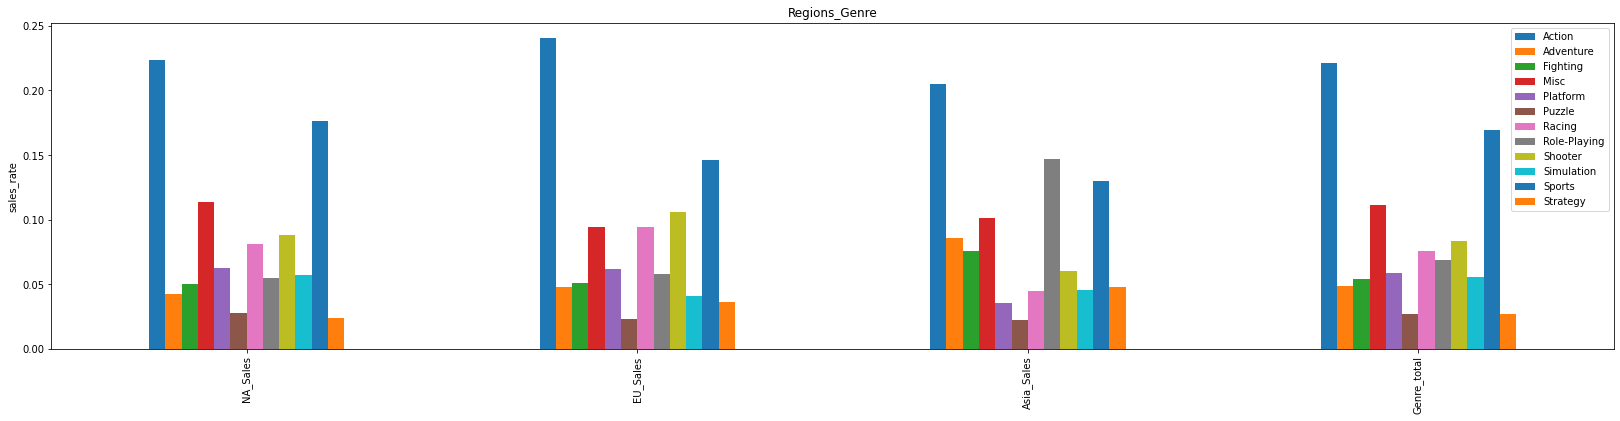

In [ ]:
ax = df10.plot(kind='bar', title='Regions_Genre', figsize=(28, 6), legend=True, fontsize=10)       
ax.set_ylabel('sales_rate', fontsize=10)    
ax.legend(['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], fontsize=10)

## NA지역은 [액션] [스포츠★] [음악(리듬)★]  // [스포츠] [음악(리듬)]
## EU지역은 [액션★] [스포츠] [슈팅★] // 외  [레이싱] [슈팅]
## Asia지역은 [액션] [롤플레이★] [스포츠] // [모험] [격투]

In [ ]:
year = df8.groupby('Year')
year.size()

Year
1980.0       3
1981.0      27
1982.0      24
1983.0       8
1984.0       1
1985.0       3
1986.0       2
1987.0       6
1988.0       3
1989.0       3
1991.0      11
1992.0      14
1993.0      28
1994.0      59
1995.0     148
1996.0     170
1997.0     182
1998.0     252
1999.0     224
2000.0     250
2001.0     358
2002.0     674
2003.0     617
2004.0     590
2005.0     787
2006.0     847
2007.0     948
2008.0    1124
2009.0    1204
2010.0    1038
2011.0     934
2012.0     504
2013.0     394
2014.0     440
2015.0     508
2016.0     311
2017.0       3
2020.0       1
dtype: int64

In [ ]:
df11 = df8.drop(['Name', 'Platform', 'Publisher'], axis=1)
df11

,Genre,NA_Sales,EU_Sales,Asia_Sales,Year
0,Action,0.04,0.00,0.00,2008.0
1,Action,0.17,0.00,0.01,2009.0
2,Adventure,0.00,0.00,0.02,2010.0
3,Misc,0.04,0.00,0.00,2010.0
4,Platform,0.12,0.09,0.04,2010.0
...,...,...,...,...,...
12991,Misc,0.00,0.00,0.02,2007.0
12992,Platform,0.15,0.04,0.01,2006.0
12993,Action,0.01,0.00,0.00,2005.0
12994,Sports,0.44,0.19,0.16,2015.0


In [ ]:
df11['sales_total'] = df11['NA_Sales'] + df11['NA_Sales'] + df11['Asia_Sales']
df11 = df11.drop(['NA_Sales', 'EU_Sales', 'Asia_Sales'], axis=1)
df11

,Genre,Year,sales_total
0,Action,2008.0,0.08
1,Action,2009.0,0.35
2,Adventure,2010.0,0.02
3,Misc,2010.0,0.08
4,Platform,2010.0,0.28
...,...,...,...
12991,Misc,2007.0,0.02
12992,Platform,2006.0,0.31
12993,Action,2005.0,0.02
12994,Sports,2015.0,1.04


In [ ]:
df12 = df11.drop(['sales_total'], axis=1)
df12

,Genre,Year
0,Action,2008.0
1,Action,2009.0
2,Adventure,2010.0
3,Misc,2010.0
4,Platform,2010.0
...,...,...
12991,Misc,2007.0
12992,Platform,2006.0
12993,Action,2005.0
12994,Sports,2015.0


In [ ]:
df13 = pd.DataFrame(df12['Genre'].value_counts())
df13

,Genre
Action,2574
Sports,1728
Misc,1375
Adventure,1175
Role-Playing,1048
Racing,940
Shooter,934
Simulation,670
Fighting,622
Platform,609


In [ ]:
df11.sort_values(by = 'Year', axis=0) 

,Genre,Year,sales_total
5725,Misc,1980.0,0.44
10268,Action,1980.0,0.64
7208,Misc,1980.0,0.50
8579,Action,1981.0,0.54
1041,Action,1981.0,0.60
...,...,...,...
852,Fighting,2016.0,0.09
7900,Role-Playing,2017.0,0.03
11934,Role-Playing,2017.0,0.01
4182,Action,2017.0,0.01


In [ ]:
year2 = df12.groupby('Year')
year2.sum()

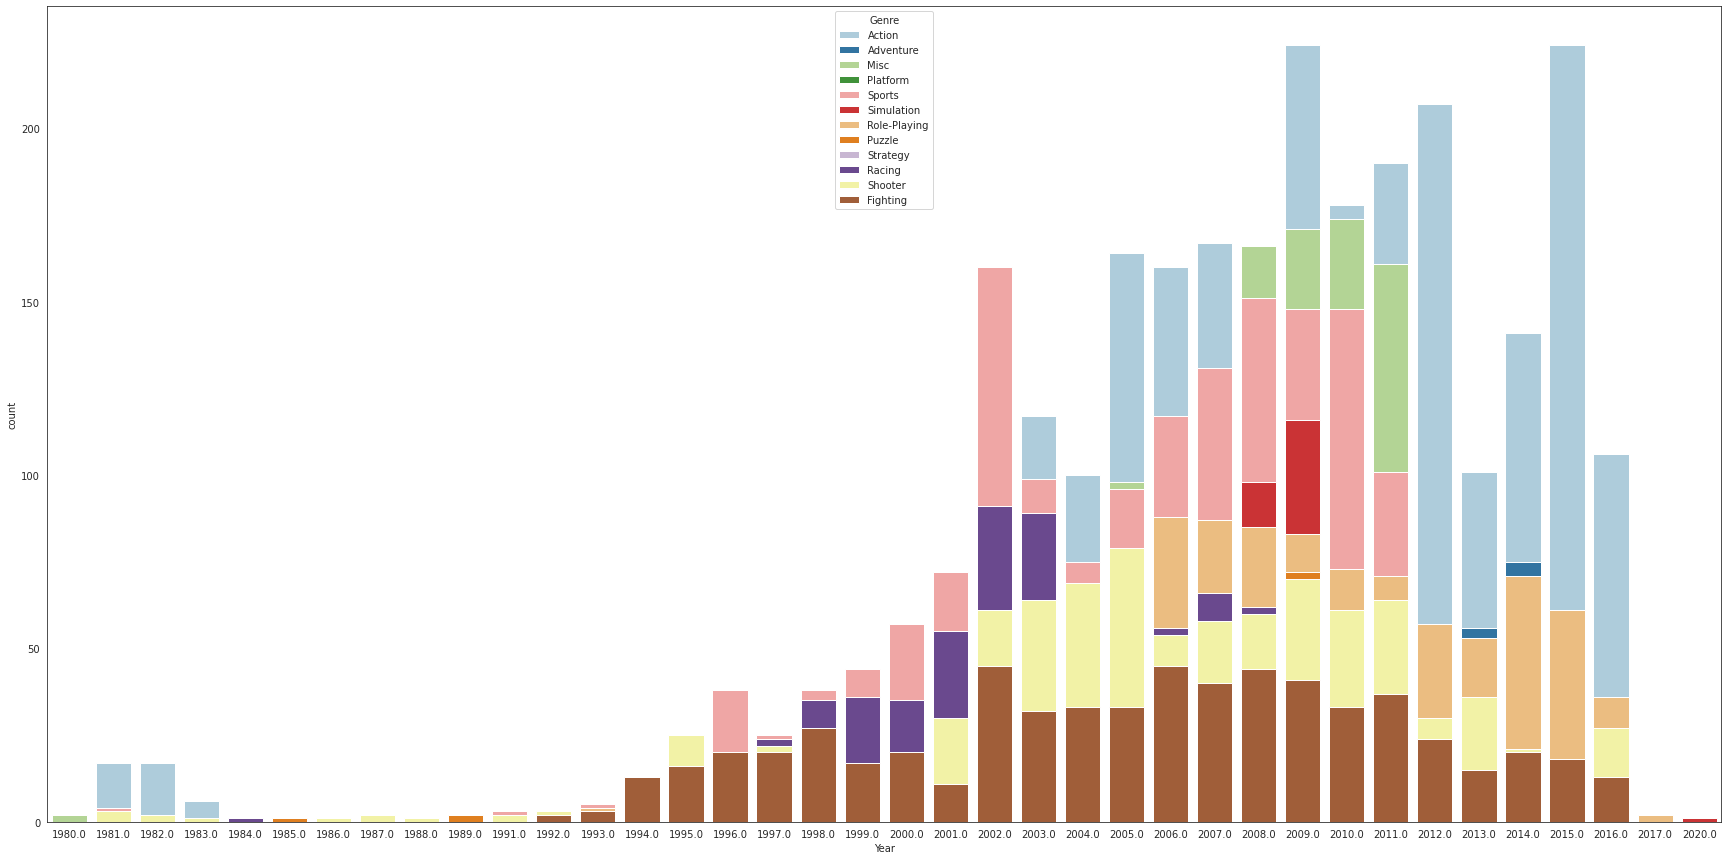

In [ ]:
fig = plt.figure(figsize=(30,15))
sns.set_style('white')

area1 = fig.add_subplot()
area1.set_title('')

sns.countplot(x='Year', hue='Genre', palette='Paired', dodge=False, data=df12, ax=area1) #dodge=False 칼럼겹치기
plt.show()

## 2012년 이후 [1.액션] [2.롤플레이] [3.슈팅] [4.격투] 중점 시장형성

In [ ]:

df8['Total_Sales'] = df8['NA_Sales'] + df8['EU_Sales'] +	df8['Asia_Sales']
df8

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,Asia_Sales,Year,Total_Sales
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0.00,0.00,2008.0,0.04
1,The Munchables,Wii,Action,Namco Bandai Games,0.17,0.00,0.01,2009.0,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.00,0.00,0.02,2010.0,0.02
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0.00,0.00,2010.0,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.12,0.09,0.04,2010.0,0.25
...,...,...,...,...,...,...,...,...,...
12991,Minna no Chizu 2,PSP,Misc,Zenrin,0.00,0.00,0.02,2007.0,0.02
12992,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,0.15,0.04,0.01,2006.0,0.20
12993,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,0.01,0.00,0.00,2005.0,0.01
12994,NBA 2K16,PS3,Sports,Take-Two Interactive,0.44,0.19,0.16,2015.0,0.79


In [ ]:
df8 = df8[['Name', 'Platform', 'Genre', 'Publisher', 'Year', 'NA_Sales', 'EU_Sales',
       'Asia_Sales', 'Total_Sales']]

In [ ]:
df8.loc[df8['Total_Sales'].idxmax()], df8.loc[df8['Total_Sales'].idxmin()] #df 컬럼의 최대값 뽑기 idx(max or min)

(Name           Rocksmith 2014
 Platform                  PS3
 Genre                    Misc
 Publisher             Ubisoft
 Year                     2013
 NA_Sales                 0.51
 EU_Sales                 0.27
 Asia_Sales                0.2
 Total_Sales              0.98
 Name: 3351, dtype: object,
 Name           SCORE International Baja 1000: The Official Game
 Platform                                                    PS2
 Genre                                                    Racing
 Publisher                                            Activision
 Year                                                       2008
 NA_Sales                                                      0
 EU_Sales                                                      0
 Asia_Sales                                                    0
 Total_Sales                                                   0
 Name: 4406, dtype: object)

In [ ]:

year_3 = df8['Total_Sales'].groupby(df8['Year']).sum() #sum붙
year_3

Year
1980.0      0.84
1981.0      9.02
1982.0      9.54
1983.0      2.98
1984.0      0.27
1985.0      0.51
1986.0      0.67
1987.0      1.94
1988.0      0.77
1989.0      0.69
1991.0      1.48
1992.0      1.48
1993.0      3.60
1994.0      6.66
1995.0     16.65
1996.0     27.80
1997.0     37.62
1998.0     49.56
1999.0     51.75
2000.0     53.34
2001.0     78.68
2002.0    122.74
2003.0    120.58
2004.0    123.87
2005.0    150.31
2006.0    120.08
2007.0    157.25
2008.0    189.53
2009.0    217.14
2010.0    171.43
2011.0    147.74
2012.0     87.93
2013.0     62.98
2014.0     72.76
2015.0     64.79
2016.0     30.82
2017.0      0.05
2020.0      0.29
Name: Total_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


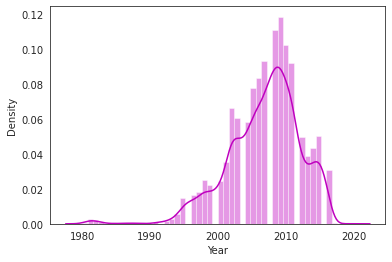

In [ ]:

year_3 = sns.distplot(df8['Year'], kde=True, hist=True, vertical=False, color='m')


In [ ]:
#

## UNFINISHED BUSINESS 21.12.13 5:20